In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('cancer_classification.csv')

In [16]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

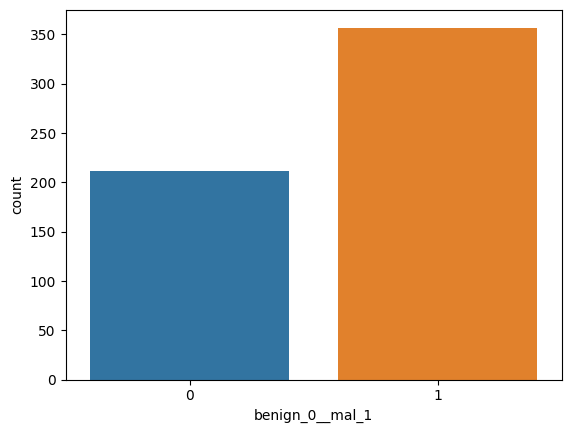

In [18]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

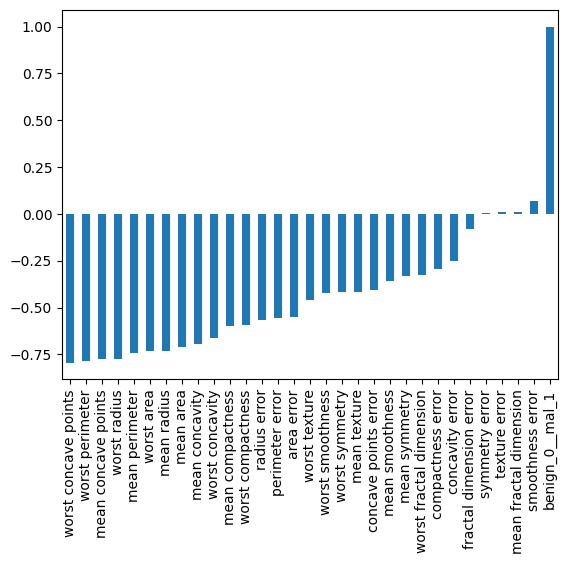

In [19]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

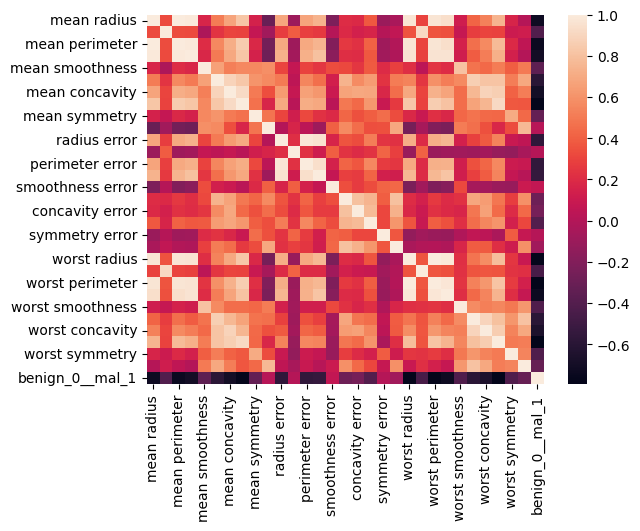

In [20]:
sns.heatmap(df.corr())

In [21]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

# Train test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [25]:
X_train.shape

(426, 30)

In [26]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# output layer (binary classification)
model.add(Dense(1,activation='sigmoid'))
# compile
model.compile(loss='binary_crossentropy',optimizer='adam')
# fit
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 5s 79ms/step - loss: 0.6686 - val_loss: 0.6555
Epoch 2/600
14/14 [==============================] - 0s 21ms/step - loss: 0.6369 - val_loss: 0.6246
Epoch 3/600
14/14 [==============================] - 0s 37ms/step - loss: 0.6041 - val_loss: 0.5876
Epoch 4/600
14/14 [==============================] - 0s 20ms/step - loss: 0.5626 - val_loss: 0.5441
Epoch 5/600
14/14 [==============================] - 0s 16ms/step - loss: 0.5161 - val_loss: 0.5007
Epoch 6/600
14/14 [==============================] - 0s 33ms/step - loss: 0.4693 - val_loss: 0.4525
Epoch 7/600
14/14 [==============================] - 0s 20ms/step - loss: 0.4193 - val_loss: 0.4034
Epoch 8/600
14/14 [==============================] - 0s 19ms/step - loss: 0.3723 - val_loss: 0.3595
Epoch 9/600
14/14 [==============================] - 0s 26ms/step - loss: 0.3280 - val_loss: 0.3224
Epoch 10/600
14/14 [==============================] - 0s 20ms/step - loss: 0.2925 - val_loss: 0.2934

In [27]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.668598,0.655530
1,0.636932,0.624594
2,0.604101,0.587577
3,0.562630,0.544097
4,0.516146,0.500669
...,...,...
595,0.008542,0.543119
596,0.007602,0.542922
597,0.007335,0.552303
598,0.007331,0.543891


<Axes: >

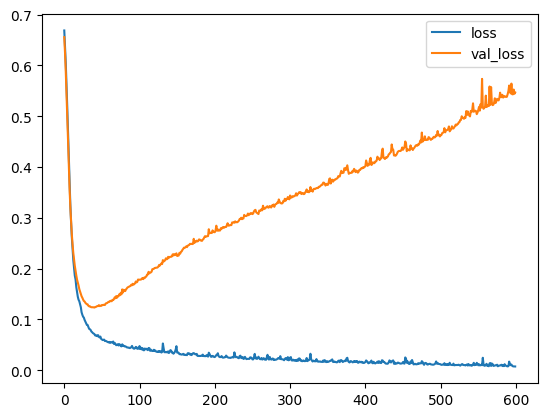

In [28]:
losses.plot()

This is **overfitting** because  actual loss is decreasing and validation loss is increasing.

# 1. Callback method to avoid overfitting

In [29]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# output layer (binary classification)
model.add(Dense(1,activation='sigmoid'))
# compile
model.compile(loss='binary_crossentropy',optimizer='adam')


Help on class EarlyStopping in module keras.src.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quanti

In [30]:
# callback (early stopping)
from tensorflow.keras.callbacks import EarlyStopping
help(EarlyStopping) 

Help on class EarlyStopping in module keras.src.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quanti

In [31]:
# early stopping for overfitting
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
# fit the model
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 4s 49ms/step - loss: 0.6953 - val_loss: 0.6607
Epoch 2/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6435 - val_loss: 0.6120
Epoch 3/600
14/14 [==============================] - 0s 17ms/step - loss: 0.5937 - val_loss: 0.5600
Epoch 4/600
14/14 [==============================] - 0s 21ms/step - loss: 0.5423 - val_loss: 0.5108
Epoch 5/600
14/14 [==============================] - 0s 17ms/step - loss: 0.4927 - val_loss: 0.4597
Epoch 6/600
14/14 [==============================] - 0s 16ms/step - loss: 0.4416 - val_loss: 0.4094
Epoch 7/600
14/14 [==============================] - 0s 18ms/step - loss: 0.3918 - val_loss: 0.3588
Epoch 8/600
14/14 [==============================] - 0s 20ms/step - loss: 0.3415 - val_loss: 0.3174
Epoch 9/600
14/14 [==============================] - 0s 19ms/step - loss: 0.3011 - val_loss: 0.2848
Epoch 10/600
14/14 [==============================] - 0s 19ms/step - loss: 0.2714 - val_loss: 0.2603

<Axes: >

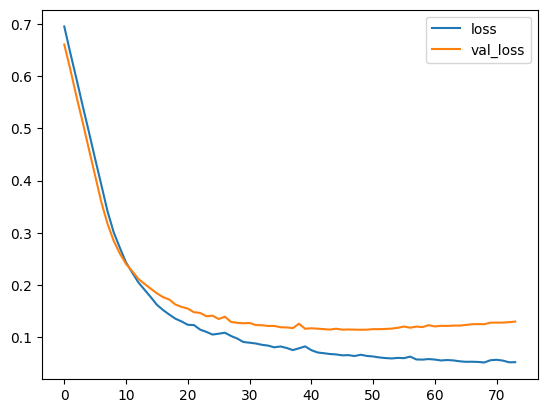

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# 2. Dropout 

In [34]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# output layer (binary classification)
model.add(Dense(1,activation='sigmoid'))
# compile
model.compile(loss='binary_crossentropy',optimizer='adam')

In [35]:
# fit
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 6s 77ms/step - loss: 0.6981 - val_loss: 0.6809
Epoch 2/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6775 - val_loss: 0.6635
Epoch 3/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6652 - val_loss: 0.6412
Epoch 4/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6370 - val_loss: 0.6109
Epoch 5/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6193 - val_loss: 0.5834
Epoch 6/600
14/14 [==============================] - 1s 40ms/step - loss: 0.6008 - val_loss: 0.5563
Epoch 7/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5874 - val_loss: 0.5304
Epoch 8/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5530 - val_loss: 0.5023
Epoch 9/600
14/14 [==============================] - 0s 11ms/step - loss: 0.5305 - val_loss: 0.4761
Epoch 10/600
14/14 [==============================] - 0s 13ms/step - loss: 0.5037 - val_loss: 0.4436

<Axes: >

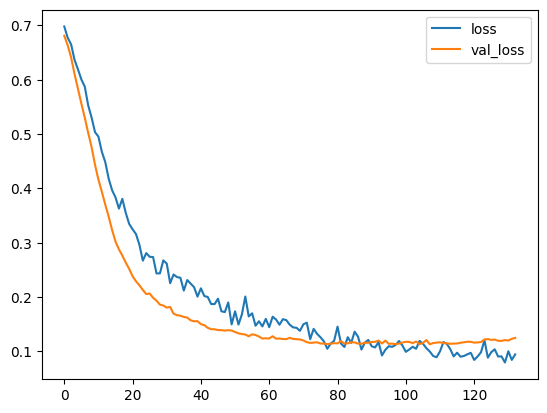

In [36]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [42]:
predictions = (model.predict(X_test) > 0.5).astype("int32")


5/5 [==============================] - 0s 5ms/step


In [43]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [44]:
print(confusion_matrix(y_test,predictions))

[[50  3]
 [ 3 87]]
